# Uninformed Search

* Use Python to implement the search methods you learned in class (BFS, DFS, UCS). Complete at least one of them to complete the lab exercises.

* Read the file and build a weighed directed-graph. When reading nodes from the file, the first node is the start node and the last node is the end node.

* There are 2 test cases.

* When dealing with nodes under the same situation, pop them by alphabet order eg .When BFS faces with A and B with same situation, pop A first then pop B.

* For test case 1:

  * ![p1](https://raw.githubusercontent.com/WLS2002/graphs/main/CS303/lab3/p1.png)

  * We start from node "S"
  * An example BFS answer of test case 1:
  * ![p2](https://raw.githubusercontent.com/WLS2002/graphs/main/CS303/lab3/p2.png)

* For test case 2:

  * ![p3](https://raw.githubusercontent.com/WLS2002/graphs/main/CS303/lab3/p3.png)

  * We start from node "A"

In [96]:
import networkx as nx
import matplotlib.pyplot as plt

# networkx version 2.3
# matplotlib version 2.2.3
# !!! When dealing with nodes under the same distance/situation, pop them by alphabet order
# eg.When BFS face with A and B with same distance, pop A first then pop B
# Finish one of the three search method is enough for lab exercise but try more if you want to get familar with python quickly.
# Modify any code you want to modify, try to make your hands dirty.
# Author Jimmy Gao


def vis(colors, position,G):
    fig, ax = plt.subplots()
    edge_labels = dict([((u, v,), d['weight']) for u, v, d in G.edges(data=True)])
    nx.draw(G, pos=position, with_labels=True, node_color=colors)  # get positions
    nx.draw_networkx_edge_labels(G, position, edge_labels=edge_labels)  # draw edge
    ax.xaxis.set_major_locator(plt.NullLocator())  # delete x axis
    ax.yaxis.set_major_locator(plt.NullLocator())  # delete y axis
    plt.show()

In [97]:
def BFS(Graph,start,end):
    """
    Write your BFS in python and get familar with python dictionary structure

    Args
    - Graph: a node dict contains all edges and their weights. keys are nodes' names. values are tuple (End_node,weight).
    - eg: Graph["S"]:[('R', '80'), ('F', '99')]
    - means there is an edge from S to R with weight 80 and an edge from S to F with weight 99
    - start: start node in graph
    - end: end node in graph
    Returns
    - do not need to return,but don't forget to yield the list
    - eg. queue:['S']
    """
    # yield [start] 
    queue = [start]
    child_queue = []
    # queue.append(start)
    print(Graph[start])
    vis = { start }

    # vis.append(start)
    while queue or child_queue:
        if not queue:
          child_queue.sort()
          print(child_queue)
          for i in child_queue:
            queue.append(i)
          child_queue.clear()
        
        child_list = Graph[queue[0]]
        yield queue
        del queue[0]
        print(len(queue))

        for i in child_list:
          if i[0] not in vis: 
            child_queue.append(i[0])
            vis.add(i[0]) 
        
    

In [98]:
def DFS(Graph,start,end):
    """
    Write your DFS in python and get familar with python dictionary structure

    Args
    - Graph: a node dict contains all edges and their weights. keys are nodes' names. values are tuple (End_node,weight).
    - eg: Graph["S"]:[('R', '80'), ('F', '99')]
    - means there is an edge from S to R with weight 80 and an edge from S to F with weight 99
    - start: start node in graph
    - end: end node in graph
    Returns
    - do not need to return,but don't forget to yield the list
    - eg. stack:['S']

    """

    stack = []
    # TODO: write your code :)
    # Initialize stack here
    yield stack  # yield stack whenever before an element popped out from the stack or after you pop the end node
    # TODO: write your code :)
    # write your algorithm

In [99]:
def UCS(Graph,start,end):
    """
    Write your UCS in python and get familar with python dictionary structure

    Args
    - Graph: a node dict contains all edges and their weights. keys are nodes' names. values are tuple (End_node,weight).
    - eg: Graph["S"]:[('R', '80'), ('F', '99')]
    - means there is an edge from S to R with weight 80 and an edge from S to F with weight 99
    - start: start node in graph
    - end: end node in graph
    Returns
    - do not need to return,but don't forget to yield the list
    - eg. queue:['S']

    """

    queue = []
    # TODO: write your code :)
    # Initialize queue here
    yield queue  # yield queue whenever before an element popped out from the queue or after you pop the end node
    # TODO: write your code :)
    # write your algorithm

[('Z', 75), ('S', 140), ('T', 118)]


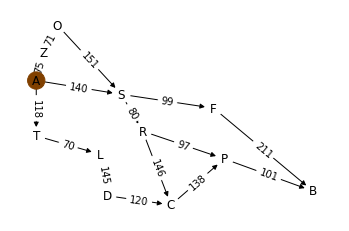

0
['S', 'T', 'Z']


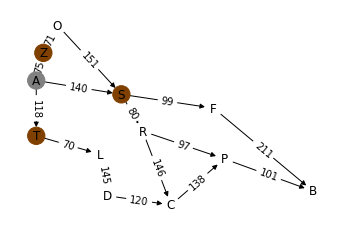

2


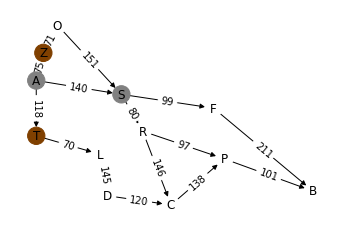

1


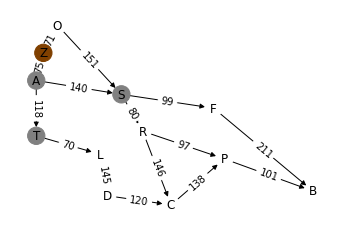

0
['F', 'L', 'O', 'R']


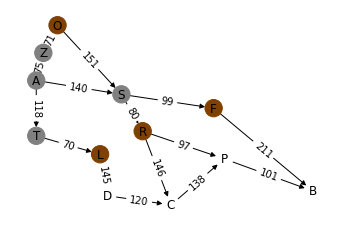

3


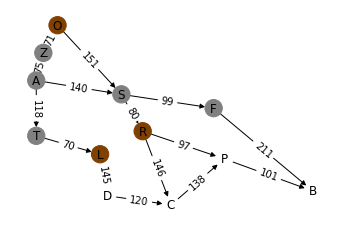

2


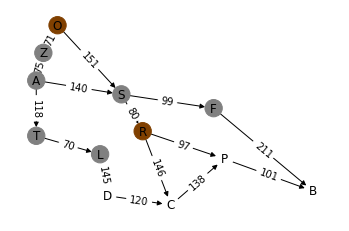

1


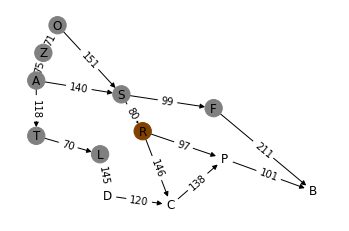

0
['B', 'C', 'D', 'P']


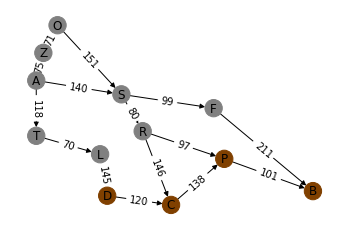

3


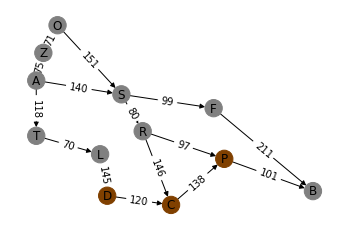

['A', 'S', 'T', 'Z', 'F', 'L', 'O', 'R', 'B']


In [100]:
# test block
test_case = 2  # TODO: change here to test another case
G = nx.DiGraph()  # for visualization
position = {}
result = []

"""
sample:
input file description:
S A B C D E F G H =>names of all nodes, the first one is start node, the last one is end node
13                =>total number of edges, next N lines are edges
S A 3             =>(Start,End,Weight) means an edge from node'S'to node'N' with weight 3
A D 3             =>an edge from node'A'to node'D' with weight 3
S B 6             =>an edge from node'S'to node'B' with weight 6
S C 2             =>an edge from node'S'to node'C' with weight 2
B D 4             =>an edge from node'B'to node'D' with weight 4
B G 9             =>an edge from node'B'to node'G' with weight 9
B E 2             =>an edge from node'B'to node'E' with weight 2
D F 5             =>an edge from node'D'to node'F' with weight 5
E F 6             =>an edge from node'E'to node'F' with weight 6
E H 5             =>an edge from node'E'to node'H' with weight 5
F G 5             =>an edge from node'F'to node'G' with weight 5
H G 8             =>an edge from node'H'to node'G' with weight 8
C E 1             =>an edge from node'C'to node'E' with weight 1
-1 0 0 1 0 0 0 -1 1 1 1 -1 1.8 1 2.5 0 1.8 -1
# Positions in visualization (x,y)
# -1 0 means node'S' position at (-1,0)
# 0 1 means node 'A' position at (0,1)
# ...

"""
# read file
with open(f'./test_cases/{test_case}.txt', 'r') as f:
    line = f.readline()
    all_nodes = line.strip().split(" ")
    line = f.readline()
    for i in range(int(line)):
        line = f.readline()
        edge = line.strip().split(" ")
        G.add_edge(edge[0], edge[1], weight=int(edge[2]))
    pos = f.readline().strip().split(" ")
    for i in range(len(all_nodes)):
        position[all_nodes[i]] = (float(pos[i * 2]), float(pos[2 * i + 1]))
Graph = dict([(u, []) for u, v, d in G.edges(data=True)])
for u, v, d in G.edges(data=True):
    Graph[u].append((v, d["weight"]))
for node in G:
    if node not in Graph.keys():
        Graph[node]=[]
# Visualization
gray = (0.5, 0.5, 0.5)
brown = (0.5, 0.25, 0)
white = (1, 1, 1)
colors_list = [(_i, white) for _i in G.nodes]
colors_dict = dict(colors_list)
start=all_nodes[0]
end=all_nodes[-1]
res = BFS(Graph,start,end)  # TODO: change here to your implemented algorithm
q = next(res)
temp_q=[]
last_q=q.copy()
last_node = None
while True:
    try:
        for node in G.nodes:
            if node in q and colors_dict[node] == white:
                colors_dict[node] = brown
            elif node not in q and colors_dict[node] == brown:
                colors_dict[node] = gray
                result.append(node)
        nodes, colors = zip(*colors_dict.items())
        vis(colors, position, G)
        if white not in colors:
            last_node = q[0]
        q = next(res)
        temp_q=last_q.copy()
        last_q=q.copy()
        if end in temp_q and end not in q:
            last_node=end
            break
    except StopIteration:
        break
for node in G.nodes:
    if node == last_node:
        colors_dict[node] = gray
result.append(last_node)
nodes, colors = zip(*colors_dict.items())
vis(colors, position, G)
print(result)